# Lesson 02. Geopandas

* 싸이그래머 / DeepCity - PyGIS [1]
* 김무성

# Contents
1. Introduction to Geopandas
2. Managing map projections

# 1. Introduction to Geopandas

* 싸이그래머 / DeepCity - PyGIS [1]
* 김무성

* data link - https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip

### Downloading data

In [1]:
!wget https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip

--2019-03-28 11:11:51--  https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/master/data/Data.zip [following]
--2019-03-28 11:11:53--  https://raw.githubusercontent.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/master/data/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12436106 (12M) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[=====================>]  11.86M   226KB/s   in 2m 14s 

2019-03-28 11:14:09 (90.8 KB/s) - ‘Data.zip’ saved [1243610

In [3]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
 extracting: Data/DAMSELFISH_distributions.cpg  
  inflating: Data/DAMSELFISH_distributions.dbf  
  inflating: Data/DAMSELFISH_distributions.prj  
  inflating: Data/DAMSELFISH_distributions.shp  
  inflating: Data/DAMSELFISH_distributions.shx  


In [4]:
!ls Data/

DAMSELFISH_distributions.cpg  DAMSELFISH_distributions.shp
DAMSELFISH_distributions.dbf  DAMSELFISH_distributions.shx
DAMSELFISH_distributions.prj


## Reading a Shapefile

In [5]:
# Import necessary modules
import geopandas as gpd

In [6]:
# Set filepath (fix path relative to yours)
fp = "./Data/DAMSELFISH_distributions.shp"

In [7]:
# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [8]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [9]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


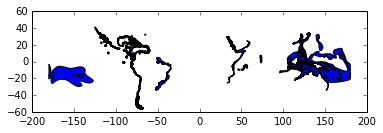

In [10]:
data.plot()

## Writing a Shapefile

In [11]:
# Create a output path for the data
out = "./Data/DAMSELFISH_distributions_SELECTION.shp"

In [12]:
# Select first 50 rows
selection = data[0:50]

In [13]:
# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

/opt/conda/lib/python3.5/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [14]:
!ls Data/

DAMSELFISH_distributions.cpg		DAMSELFISH_distributions_SELECTION.shp
DAMSELFISH_distributions.dbf		DAMSELFISH_distributions_SELECTION.shx
DAMSELFISH_distributions.prj		DAMSELFISH_distributions.shp
DAMSELFISH_distributions_SELECTION.cpg	DAMSELFISH_distributions.shx
DAMSELFISH_distributions_SELECTION.dbf


## Geometries in Geopandas

##### Let’s print the first 5 rows of the column ‘geometry’:

In [15]:
# It is possible to use only specific columns by specifying the column name within square brackets []
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

##### Let’s print the areas of the first 5 polygons:

In [16]:
# Make a selection that contains only the first five rows
selection = data[0:5]

In [17]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [18]:
data['area'] = data.area

In [19]:
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [22]:
# Maximum area
max_area = data['area'].max()

In [23]:
max_area

1493.2009183643906

In [24]:
# Mean area
mean_area = data['area'].mean()

In [25]:
mean_area

19.958433617208492

## Creating geometries into a GeoDataFrame

In [26]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

In [27]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [28]:
# Let's see what's inside
newdata

""


In [29]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

In [30]:
# Let's see what's inside
newdata

,geometry


In [31]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [32]:
# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

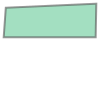

In [33]:
# Let's see what we have
poly

In [34]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

In [35]:
newdata

,geometry
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16..."


In [36]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'

In [37]:
# Let's check the data
newdata

,geometry,Location
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16...",Senaatintori


In [38]:
print(newdata.crs)

None


In [39]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

In [40]:
# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

In [41]:
# Let's see how the crs definition looks like
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [42]:
# Determine the output path for the Shapefile
outfp = "./Data/Senaatintori.shp"

In [43]:
# Write the data into that Shapefile
newdata.to_file(out)

/opt/conda/lib/python3.5/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [44]:
!ls ./Data/

DAMSELFISH_distributions.cpg		DAMSELFISH_distributions_SELECTION.prj
DAMSELFISH_distributions.dbf		DAMSELFISH_distributions_SELECTION.shp
DAMSELFISH_distributions.prj		DAMSELFISH_distributions_SELECTION.shx
DAMSELFISH_distributions_SELECTION.cpg	DAMSELFISH_distributions.shp
DAMSELFISH_distributions_SELECTION.dbf	DAMSELFISH_distributions.shx


# 참고자료
* [1]  Introduction to Python GIS -course 2018! - https://automating-gis-processes.github.io/CSC18/index.html